# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

#### Starting With Solution <br>

#### Clean Missing Values
Checking for null values

In [2]:
df_flights.isnull().sum() #to check for null values

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

There appears to be 2761 null values in Column 'DepDel15' which is 'A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")' 
Next we verify the DepDelay against these values, if they are really delayed.

In [3]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe() # verify the DepDelay against these values

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

Since the mean min and max are all zero implying the flights were not delayed, 
we can safely replace the null values with zero.

In [4]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0) #replacing NaN with 0
df_flights.isnull().sum() # Verify the null values in the dataset

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Lets check the summary statistics and distribution before and after removing outliers.

In [5]:
# Summary Statistics
summary_dep_delay = df_flights[["DepDelay"]].describe() 
summary_arr_delay = df_flights[["ArrDelay"]].describe()
side_by_side_summary = pd.concat([summary_dep_delay, summary_arr_delay], axis=1)
print(side_by_side_summary)

            DepDelay       ArrDelay
count  271940.000000  271940.000000
mean       10.350449       6.496650
std        35.673710      38.230331
min       -63.000000     -75.000000
25%        -4.000000     -11.000000
50%        -1.000000      -3.000000
75%         9.000000      10.000000
max      1425.000000    1440.000000


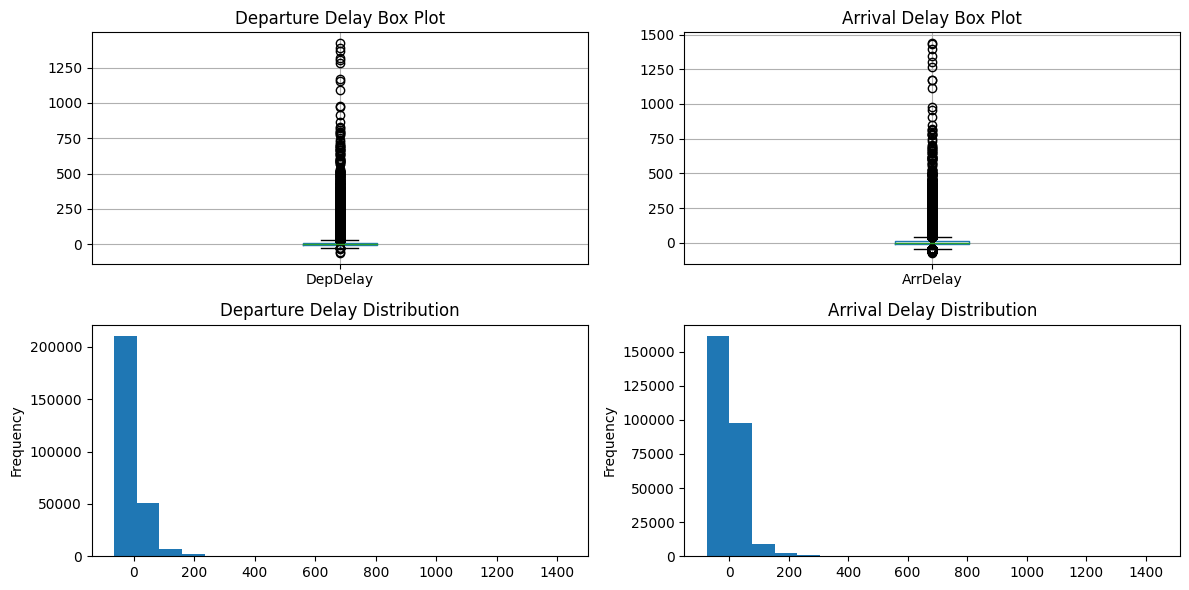

In [6]:
# Printing Boxplots to check outliers
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
df_flights[["DepDelay"]].boxplot(ax=axes[0,0])
axes[0,0].set_title("Departure Delay Box Plot")
df_flights[["ArrDelay"]].boxplot(ax=axes[0,1])
axes[0,1].set_title("Arrival Delay Box Plot")
df_flights["DepDelay"].plot.hist(ax=axes[1,0], bins=20)
axes[1,0].set_title("Departure Delay Distribution")
df_flights["ArrDelay"].plot.hist(ax=axes[1,1], bins=20)
axes[1,1].set_title("Arrival Delay Distribution")
plt.tight_layout()
plt.show()

A lot of outliers and a both the distribution appear to be right skewed.

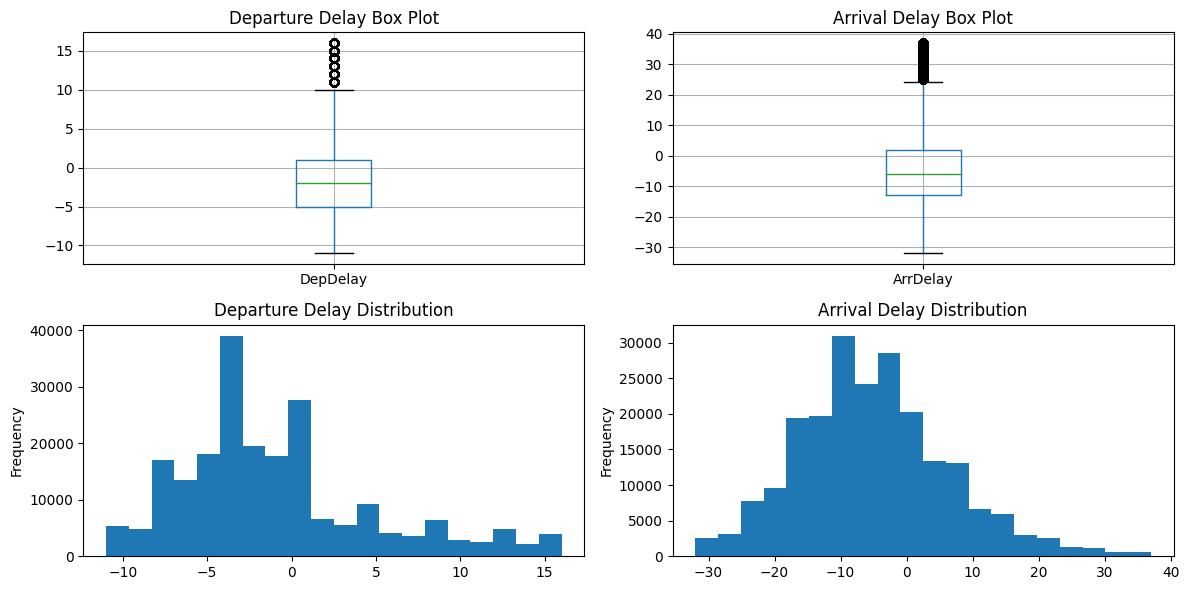

In [7]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
df_flights[["DepDelay"]].boxplot(ax=axes[0,0])
axes[0,0].set_title("Departure Delay Box Plot")
df_flights[["ArrDelay"]].boxplot(ax=axes[0,1])
axes[0,1].set_title("Arrival Delay Box Plot")
df_flights["DepDelay"].plot.hist(ax=axes[1,0], bins=20)
axes[1,0].set_title("Departure Delay Distribution")
df_flights["ArrDelay"].plot.hist(ax=axes[1,1], bins=20)
axes[1,1].set_title("Arrival Delay Distribution")
plt.tight_layout()
plt.show()

A much cleaner and closely representing a gaussian distribution. 

#### Summary statistics for the numeric columns.

In [8]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


### Approaching the specific questions <br>
#### What are the mean departure and arrival delays?

In [9]:
df_flights[["DepDelay", "ArrDelay"]].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

#### How do the carriers compare in terms of arrival delay performance?


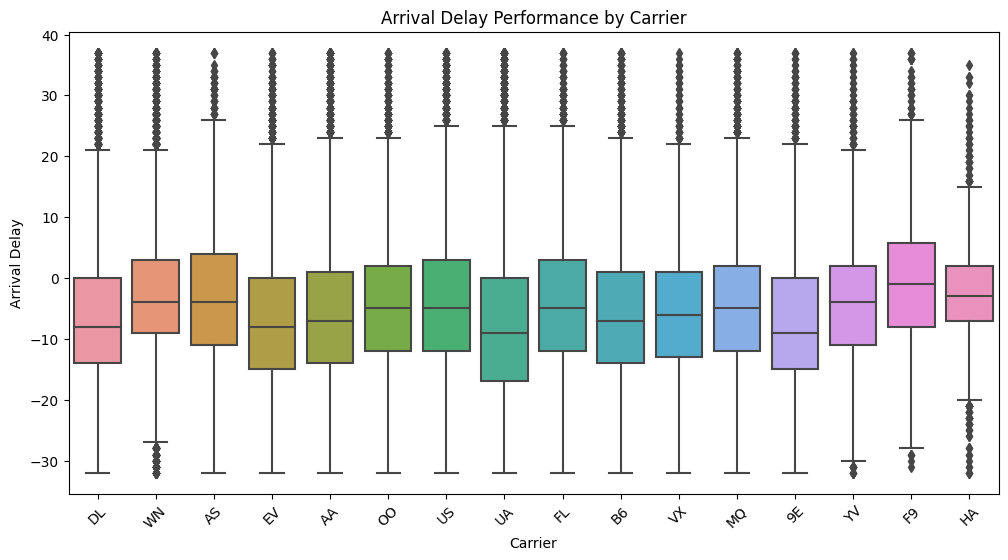

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_flights, x='Carrier', y='ArrDelay')
plt.title("Arrival Delay Performance by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Arrival Delay")
plt.xticks(rotation=45)
plt.show()


#### Is there a noticable difference in arrival delays for different days of the week?
Answer : No

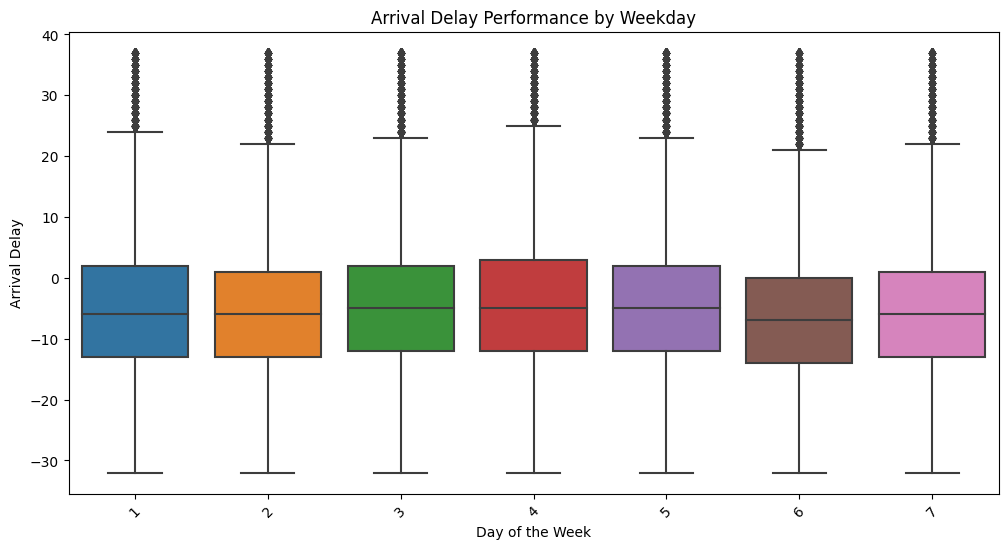

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_flights, x='DayOfWeek', y='ArrDelay')
plt.title("Arrival Delay Performance by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Arrival Delay")
plt.xticks(rotation=45)
plt.show()

#### Which departure airport has the highest average departure delay?

In [12]:
average_dep_delay_by_airport = df_flights.groupby('OriginAirportName')['DepDelay'].mean()
average_dep_delay_by_airport = pd.DataFrame(average_dep_delay_by_airport).sort_values('DepDelay', ascending=False)

print(f"{average_dep_delay_by_airport.index[0]},{average_dep_delay_by_airport.iloc[0]}")

Chicago Midway International,DepDelay    2.36596
Name: Chicago Midway International, dtype: float64


#### Do late departures tend to result in longer arrival delays than on-time departures?
Answer : Yes

In [13]:
late_departures = df_flights[df_flights['DepDel15'] > 0]
on_time_departures = df_flights[df_flights['DepDel15'] <= 0]
average_arrival_delay_late = late_departures['ArrDelay'].mean()
average_arrival_delay_on_time = on_time_departures['ArrDelay'].mean()

print(f"Delay for late departures: {average_arrival_delay_late:.2f} mins")
print(f"Delay for on-time departures: {average_arrival_delay_on_time:.2f} mins")

Delay for late departures: 9.56 mins
Delay for on-time departures: -5.30 mins


#### Which route (from origin airport to destination airport) has the most late arrivals?

In [14]:
late_arrivals = df_flights[df_flights['ArrDel15'] > 0]
most_late_arrival_route = late_arrivals.groupby(['OriginAirportName', 'DestAirportName']).size().idxmax()

print(most_late_arrival_route)

('San Francisco International', 'Los Angeles International')


#### Which route has the highest average arrival delay?

In [15]:
average_arrival_delay_by_route = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean()
route_highest_avg_delay = average_arrival_delay_by_route.idxmax()

print(route_highest_avg_delay)


('Louis Armstrong New Orleans International', 'Ronald Reagan Washington National')
